In [1]:
import numpy as np
from numba import njit

import readSim as rs
import scipy.optimize as op

import matplotlib.pyplot as plt
%matplotlib widget


In [2]:
sims = rs.Sims('/home/lorenzo/phd/LQG/ClosedUniverse_TimeVSa0')

For each simulation:
1) Find when OS discontinuity reaches $x_B$ looking at direction of motion
2) Get time
3) Go to 1)
4) Interpolate $t = f(a_0)$

In [6]:
def fxb(x, alpha, rs):
    return 1 + alpha / x**2 - rs / x**3

for key in sims.simslist:

    sim = sims[key]

    rs = sim.hor_loc
    eps = - sim.r0**2 / sim.a0**2
    x = sim.xgrid

    cond1 = x > 1
    skipped = len(x) - sum(cond1)
    cond2 = x < sim.hor_loc*1.1
    mask = cond1 & cond2

    # 1)
    peak_pos_old = np.Inf
    for i in range(sim.niter):
        rho = sim.get(i, 'rho')[mask]
        peak_pos = sim.find_peak(rho, height=[np.max(rho)*0.01])
        peak_pos += skipped

        if peak_pos - peak_pos_old >= 0:
            break
        else:
            peak_pos_old = peak_pos
            
    print(sim.a0, i, sim.get(i, 't'))
     

70.0 67 6.7000999999977235
300.0 67 6.7000999999977235
700.0 67 6.7000999999977235
150.0 67 6.7000999999977235
100.0 67 6.7000999999977235
55.0 67 6.7000999999977235
90.0 67 6.7000999999977235
40.0 68 6.8000999999974905
80.0 67 6.7000999999977235
60.0 67 6.7000999999977235
1000.0 67 6.7000999999977235
500.0 67 6.7000999999977235
400.0 67 6.7000999999977235
200.0 67 6.7000999999977235
50.0 68 6.8000999999974905
240.0 67 6.7000999999977235
120.0 67 6.7000999999977235
180.0 67 6.7000999999977235


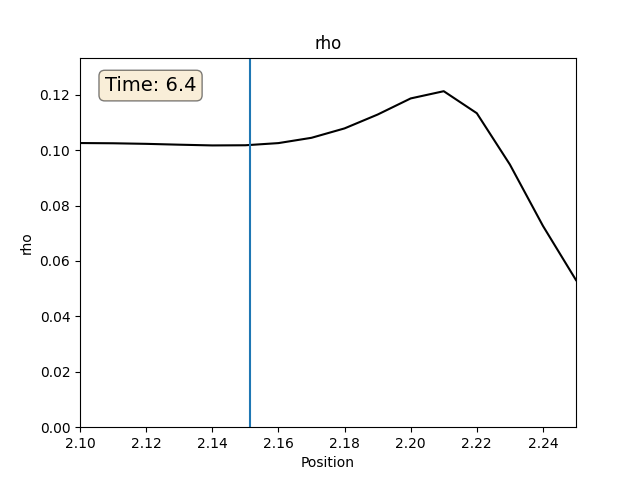

In [ ]:
fig, ax = sims[sims.simslist[0]].plot('rho', iteration=64, xrange=(2.1,2.25), return_handles=True)
ax.axvline(2.1512771488717606)